In [1]:
import urllib2, zipfile, tarfile

In [2]:
url = 'http://download.maxmind.com/download/worldcities/'

In [3]:
filename='worldcitiespop.txt.gz'

In [4]:
downloaded = urllib2.urlopen(url+filename)

In [5]:
folder = 'data'

In [6]:
# mkdir $folder

In [7]:
cd $folder

X:\FTMAS_GTAA\P\ToJoyce\iPython\data


In [8]:
with open(filename,'wb') as f:
    f.write(downloaded.read())

In [9]:
with tarfile.open(filename, 'r') as tar:
    tar.extractall('.')

ReadError: file could not be opened successfully

In [ ]:
with zipfile.ZipFile(filename) as zip:
    zip.extractall('.')

In [11]:
cd worldcitiespop.txt

X:\FTMAS_GTAA\P\ToJoyce\iPython\data\worldcitiespop.txt


In [13]:
%bookmark mmData

In [1]:
import pandas as pd
import numpy as np

In [9]:
cd data/worldcitiespop.txt

X:\FTMAS_GTAA\P\ToJoyce\iPython\data\worldcitiespop.txt


In [10]:
filename = 'worldcitiespop.txt'
data = pd.read_csv(filename)

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.shape, data.keys()

((3173958, 7),
 Index([u'Country', u'City', u'AccentCity', u'Region', u'Population',
        u'Latitude', u'Longitude'],
       dtype='object'))

In [18]:
data.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,6,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,7,79876.0,-20.333333,30.033333


In [21]:
data.City.head()

0         aixas
1    aixirivali
2    aixirivall
3     aixirvall
4      aixovall
Name: City, dtype: object

In [22]:
data.City[4]

'aixovall'

In [34]:
data.Country.tail(1)

3173957    zw
Name: Country, dtype: object

In [ ]:
data[data.Country== 'zw']

In [41]:
population = np.array(data.Population)

In [42]:
population.shape

(3173958L,)

In [44]:
np.isnan(population)

array([ True,  True,  True, ...,  True,  True, False], dtype=bool)

In [45]:
x = population[~_]

In [47]:
len(x)

47980

In [49]:
len(x) / float(len(population))

0.015116772181610469

In [51]:
type(x)

numpy.ndarray

In [52]:
x.mean()

47719.57063359733

In [53]:
data.Population.describe()

count    4.798000e+04
mean     4.771957e+04
std      3.028887e+05
min      7.000000e+00
25%      3.732000e+03
50%      1.077900e+04
75%      2.799050e+04
max      3.148050e+07
Name: Population, dtype: float64

In [19]:
locations = data[['Latitude','Longitude']].as_matrix()

In [58]:
def locate(x, y):
    d = locations - np.array([x, y])
    distances = d[:,0] ** 2 + d[:,1] ** 2
    closest = distances.argmin()
    return data.AccentCity[closest]

In [59]:
print(locate(48.861, 2.3358))

Paris


In [70]:
d = locations[:,0] ** 2 + locations[:,1] ** 2 

In [75]:
d.argmin(),  locations[d.argmin()]

(1013460, array([ 4.7666667, -1.9666667]))

In [76]:
d.argmax(),  locations[d.argmax()]

(2486769, array([  71.133333, -179.7     ]))

In [11]:
import matplotlib.pyplot as plt

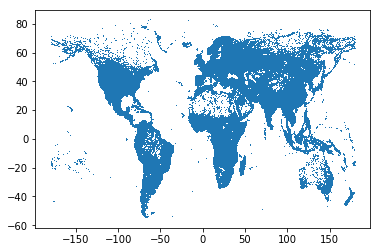

In [89]:
plt.plot(data.Longitude, data.Latitude, ',')
plt.show()

In [13]:
from mpl_toolkits.basemap import Basemap

In [14]:
m = Basemap(projection='mill', llcrnrlat=-65, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180)

In [15]:
x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)

In [17]:
population = data.Population

In [22]:
x,y = m(locations[:,0], locations[:,1])

In [25]:
weights = population.copy()
weights[np.isnan(weights)] = 1000

In [27]:
type(weights)

pandas.core.series.Series

In [30]:
h, _, _ = np.histogram2d(x, y, bins=(np.linspace(x0, x1, 500), np.linspace(y0, y1, 500)), weights=weights)

In [34]:
h[h==0] = 1

In [36]:
import scipy.ndimage.filters
z = scipy.ndimage.filters.gaussian_filter(np.log(h.T),1)

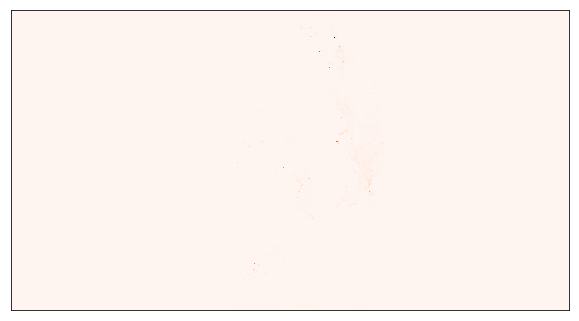

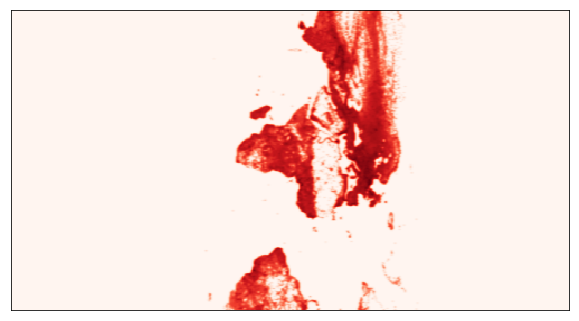

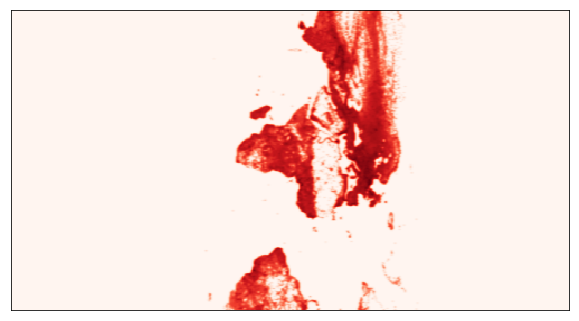

In [43]:
plt.figure(figsize=(10,6))
#m.drawcoastline()
m.imshow(z, origin='lower', extent=[x0, x1, y0, y1], cmap=plt.get_cmap('Reds'))
plt.show()